# Машинное обучение. ВМК МГУ.
## Практическое задание 7: Кластеризация. Методы снижения размерности.

### Важно! О формате сдачи

* **Практически все выделенные задания из ноутбука оцениваются по системе <font color='red'>кросс-рецензирования</font>. Задания, в котором надо реализовать свой код и послать в систему, выделены здесь и в pdf отдельно**
* **В этом ноутбуке есть задание на unit-тестирование**
* **При решении ноутбука используйте данный шаблон. Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий. Добавлять свои ячейки, при необходимости, конечно можно**
* **Везде, где в формулровке задания есть какой-либо вопрос (или просьба вывода), необходимо прописать ответ в ячейку (код или markdown).**
* **Наличие кода решения обязательно. Письменные ответы на вопросы без сопутствующего кода оцениваются в 0 баллов.**

**А также..**

Если в ячейке написана фраза `Ваш ответ здесь: (ｏ・_・)ノ”(ノ_<、)`, то ожидается ответ в виде текста (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если в ячейке написано `# Ваш код здесь:＼(º □ º l|l)/`, то ожидается ответ в виде кода (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если есть и ячейка с фразой `Ваш ответ здесь: (ｏ・_・)ノ”(ノ_<、)`, и ячейка с фразой `# Ваш код здесь:＼(º □ º l|l)/`, то в ответе ожидается и код, и текст)

**В этом задании вы..:**

* Познакомитесь с одним способом визуализации процесса обучения
* Сравните между собой результаты разных способов кластеризации
* Посмотрите и реализуете несколько метрик качества кластеризации
* Попробуете разные методы снижения размерности

### *Примерное время выполнения всех ячеек ноутбука: 30 минут*

Если вы работаете с ноутбуком <font color='red'>локально</font>, то перед началом выполнения переведите ноутбук в `Доверенный режим` (`Trusted`) для корректного отображения изображений:

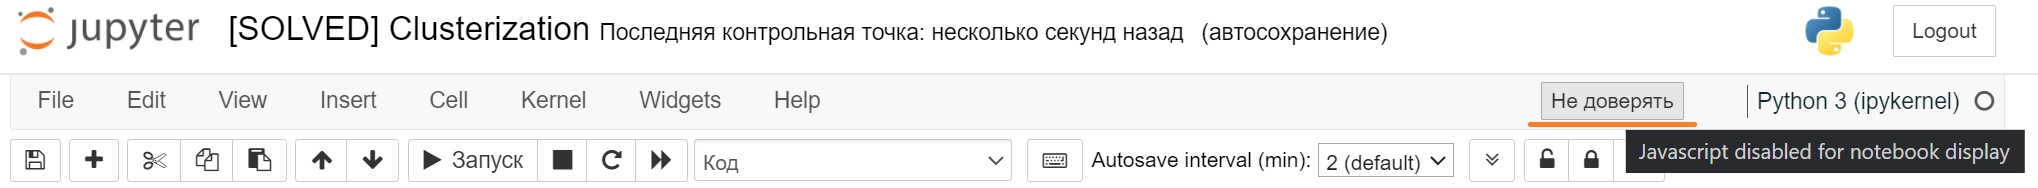

In [1]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

# 0. Введение. [кросспроверка 2 балла]

## 0.1 О задании

В данной работе вам предстоит познакомится с методами машинного обучения без учителя — кластеризацией и алгоритмами снижения размерности.

В данном задании предлагается две основных части ($1, 2$) и одна вспомогательная ($0$). Сумарное всемя выполнения ноутбука порядка тридцати минут при выполнении в `Google Colab`.

## 0.2 Необходимые библиотеки

### Установка в Google Colab
Если вы используете Google Colab, то вам достаточно установить библиотеки с помощью ячейки ниже. 

После установки нужных версий нажмите на кнопку `Restart runtime`, которая появится в следующей ячейке после завершения ее выполнения.

После перезапуска (`Restart runtime`) устанавливать библиотеки еще раз не нужно, достаточно проверить, что установилась их новая версия.

**Важно!** 
Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

**Обратите внимание, что установка `torch` и `tensorflow` через `pip` может сломать ваше окружение, особенно если вы используете GPU. Выполняйте их установку в соответствии с Вашей конфигурацией системы или в отдельном виртуальном окружении**

<font color="red">Внимание! Окружение с библиотеками обновилось! </font> Для уменьшения числа ошибок из-за разных версий советуем локально сделать новое вирутальное окружение с новым requirements2.txt https://drive.google.com/file/d/1emagLwrQrZoaitHvoRkp2ZOFNg0TsZdR/view?usp=share_link . Старое окружение лучше оставить для совместимости с предыдущими заданиями (если захотите их еще дорешать)

Окружения с библиотеками можно создать  следующим образом

**using pip**

    python3 -m venv <env_name>
    source <env_name>/bin/activate
    pip3 install -r requirements2.txt

**using Conda**

    conda create --name <env_name> --file requirements2.txt


In [2]:
! gdown 17FhOhXBB9vlXP5Xoy1Ge_ugVGaw_5VLa
! pip install -r ./requirements2.txt

if 'google.colab' in str(get_ipython()):
    import IPython, ipywidgets, google

    button = ipywidgets.Button(
        description='Нажмите, чтобы перезапустить Google Colab Runtime',
        layout=ipywidgets.Layout(width='auto', height='40px')
    )        
    button.on_click(lambda _: get_ipython().kernel.do_shutdown(True))
    IPython.display.display(button)

Downloading...
From: https://drive.google.com/uc?id=17FhOhXBB9vlXP5Xoy1Ge_ugVGaw_5VLa
To: /home/sazonov/PycharmProjects/CMC_ML/Task7(Clusterization)/requirements2.txt
100%|███████████████████████████████████████████| 416/416 [00:00<00:00, 905kB/s]

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


Здесь перечислены основные функции и библиотеки, которые могут понадобиться Вам в процессе выполнения задания. Подключение других библиотек возможно, но нежелательно. **Работа каких-либо других библиотек не гарантируется.**

In [3]:
import os

import gdown

import scipy

import numpy as np

import tqdm.auto as tqdm

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from ipywidgets import interactive, fixed, interact_manual, IntSlider, FloatLogSlider, FloatSlider

import torch
from torchvision.datasets import CIFAR10

# Необходима преварительная установка tensorflow
from keras.applications.inception_v3 import InceptionV3, preprocess_input

import sklearn

from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Библиотека umap-learn, а не umap
from umap import UMAP
from sklearn.manifold import TSNE, Isomap

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_moons, make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

2023-03-11 00:21:12.142615: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-11 00:21:12.535853: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-11 00:21:13.541178: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-11 00:21:13.541253: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

## 0.3 Введение в интерактивные графики jupyter notebook [кросспроверка 2 балла]

Информация об особенностях интерактивных графиков вынесена в отдельный ноутбук [Deep_dive_into_ipynb[Tutorial].ipynb](https://colab.research.google.com/drive/1KKe2z1AqWtgtTjbsoJjqiaUesRF_gsU2?usp=sharing). **Ознакомьтесь с ним перед дальнейшим выполнением задания!**

#### **Задание 0.0 [кросспроверка, 2 балла][код, вопрос]** 
* Сделайте $2\text{-}3$ различных интерактивных графика.
* Посмотрите в чём заключается смысл функций [`interactive`, `interact_manual`, `fixed`, `IntSlider`, `FloatLogSlider`](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html). 
* Какие ещё [слайдеры и динамические виджеты бывают](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)? 
* Как вам кажется, удобный ли это инструмент? 
* Предложите несколько примеров, когда он мог бы ещё пригодиться.

In [ ]:
# Ваш код здесь:＼(º □ º l|l)/

*Ваш ответ здесь:* (ｏ・_・)ノ”(ノ_<、)

<font color='red'>**Обратите внимание, что динамическое содержимое может некорректно сохраняться в jupyter notebook. Используйте его только для локальной визуализации. Все графики, необходимые для сдачи задания должны быть статическими. Переход в статический режим происходит с помощью магической команды `%matplotlib inline` (приведена ниже).**</font>

**Обязательно убедитесь, что все графики корректно сохранились корректно в ноутбуке перед сдачей в систему.**

In [ ]:
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 300

## 0.4 Ещё несколько важных замечаний

При выполнении задания <font color='red'>запрещено</font>:
1. Менять те seed, которые явно указаны в коде
2. Менять прототипы функций, классов, методов классов
3. Менять константы, используемые для генерации выборок

При оформлении задания обратите внимание на форматирование кода и на оформление графиков:

* Весь код должен быть оформлен в строгом соответствии с [PEP8](https://pep8.org/)

Графики должны быть с одной стороны понятными и информативными, а с другой стороны *красивыми*. Вот несколько пунктов, которые помогут удовлетворить этим требования:
1. Все графики должны быть отрисованы в **векторном формате**. Обратите внимание, что смена режима графиков с динамического на статический и обратно может приводить к сбросу параметров отрисовки графиков. Переход в векторный режим можно выполнить с помощью команды `matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')`. Если изображения в векторном формате приводят к слишком большому размеру Jupyter Notebook можете использовать растровые изображения с **высоким dpi**. Напирмер, можно установить глобальный dpi в matplotlib: `matplotlib.rcParams['figure.dpi'] = 300`
2. На всех графиках без исключения должна быть нарисована сетка
3. Все графики и группы графиков должны иметь заголовок (`title`)
4. При необходимости оси должны быть подписаны
5. Если на графике отображено несколько сущностей (линии/точки/bar разных цветов, формы и так далее), то необходима исчерпывающая легенда
6. Все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном и так далее)
7. Масштаб по каждой оси на графике должен быть выбран правильно. Используйте масштабы `log`, `symlog` по необходимости
8. Если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах)
9. Частота отметок по каждой оси должна быть тщательно подобрана, по необходимости задавайте `[xy]ticks`, `[xy]ticklabels` вручную. Подписи тиков на осях не должны сливаться как на одной оси, так и между ними
10. Помните, что matplotlib умеет выполнять [рендеринг Latex](https://matplotlib.org/stable/gallery/text_labels_and_annotations/tex_demo.html). Используйте эту возможность для написания формул в заголовках, легенде и в подписях осей
11. Используйте *красивую* цветовую палитру с хорошо различимыми цветами. Примеры цветовых палитр можно посмотреть [здесь](https://matplotlib.org/stable/gallery/color/colormap_reference.html). При наличи особенностей восприятия цвета можно использовать специальные палитры:
```python
plt.style.use('seaborn-colorblind')
# Или
plt.style.use('tableau-colorblind10')
# Затем, при отрисовке графиков не используйте параметр cmap
```
12. Графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно

# 1. Кластеризация на синтетических данных. [кросспроверка 9 баллов,  unittests 16 баллов]

В данной части мы рассмотрим несколько наборов синтетических данных и сравним как разные алгоритмы кластеризации ведут себя в низкоразмерных и высокоразмерных пространствах

## a. Двумерные данные

Сгенерируем двумерные данные с $4$ естественными кластерами разного размера и плотности.

In [ ]:
data_moons, labels_moons = make_moons(n_samples=300, shuffle=True, noise=0.09, random_state=6417)
data_moons, labels_moons = data_moons[labels_moons == 0], labels_moons[labels_moons == 0]

data_blobs, labels_blobs = make_blobs(
    n_samples=500, n_features=2, centers=[(0, -0.2), (-1.5, -1.5), (-1.5, 1.5)], 
    cluster_std=[0.2, 0.4, 0.6], center_box=[-10.0, 10.0], 
    shuffle=True, random_state=6417, return_centers=False
)

data = np.concatenate([data_moons, data_blobs])
labels = np.concatenate([labels_moons, labels_blobs + 1])

In [ ]:
def plot_2d_data(data, labels, title='Исходные данные', cmap='tab20', ax=None):
    '''
    Отрисовка 2d scatter plot. 
    :param np.ndarray data: 2d массив точек
    :param Union[list, np.ndarray] labels: список меток для каждой точки выборки
    :param str title: Заголовок графика
    :param str cmap: Цветовая палитра
    :param ax Optional[matplotlib.axes.Axes]: Оси для отрисовки графика.
        Если оси не заданы, то создаётся новая фигура и сразу же происходит её отрисовка
        Иначе, график добавляется на существуюущие оси. Отрисовки фигуры не происходит
    '''
    n_clusters = len(np.unique(labels))
    
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    else:
        fig = None
        
    scatter = ax.scatter(
        data[:, 0], data[:, 1], c=labels, 
        cmap=plt.get_cmap(cmap, n_clusters)
    )

    cbar = plt.colorbar(scatter, label='Номер кластера', ax=ax)
    cbar.set_ticks(np.min(labels) + (np.arange(n_clusters) + 0.5) * (n_clusters - 1) / n_clusters)
    cbar.set_ticklabels(np.unique(labels))

    ax.set_title(title)
    ax.grid(True)
    
    if fig is not None:
        fig.tight_layout()
        plt.show()

In [ ]:
plot_2d_data(data, labels, title='Исходные данные', cmap='tab20')

#### **Задание 1.a.1 [кросспроверка, 1 балл][код]** 
<a id='task_1.a.1'></a>
Запустите следующие алгоритмы кластеризации на данной выборке: `KMeans`, `DBSCAN`, `AgglomerativeClustering`. Визуально подберите наилучшие параметры для этих алгоритмов (`n_clusters`, `eps`, `min_samples`, `linkage`). Изобразите наилучшие получившиеся разбиения на графиках.

*Советы:*
1. Используйте виджеты для ручного подбора параметров
2. Используйте готовую функцию `plot_2d_data` для отрисовки графиков. Обязательно меняйте заголовок

In [ ]:
# Ваш код здесь:＼(º □ º l|l)/

#### **Задание 1.a.2 [кросспроверка, 1 балл][вопрос]**
Основываясь на знании о работе данных алгоритмов, объясните, почему кластеры были сформированы таким образом. Какой алгоритм лучше всего работает на предложенных данных?

*Ваш ответ здесь:* (ｏ・_・)ノ”(ノ_<、)

## b. Многомерные данные. Снижение размерности

Теперь попробуем кластеризовать данные в высокоразмерном пространстве. Существенным отличием от двумерного случая является невозможность прямой визуальной оценки кластеризации.

Одним из наглядных способов оценки кластеризации является снижение размерности. В данной части вам предлагается использовать алгоритм `TSNE` для визуализации данных. Подробнее про данный алгоритм можно прочитать в [блоге](https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a) и в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).

In [ ]:
data, labels = make_classification(
    n_samples=1000, n_features=200, n_informative=100,
    n_repeated=0, n_classes=5, n_clusters_per_class=2, weights=None, 
    flip_y=0.01, class_sep=2.5, hypercube=True, shift=0.0, scale=1.0, 
    shuffle=True, random_state=6417
)

#### **Задание 1.b.1 [кросспроверка, 1 балл][код, вопрос]**
Примените алгоритм `TSNE` для снижения размерности до двух. Учтите, что `TSNE` суть есть метрический алгоритм и существенно зависит от масштаба признаков — некорректный и различающийся масштаб признаков гарантированно приведёт к неинтерпретируемым результатам. Можете попробовать подобрать гиперпараметры алгоритма для получения лучшей визуализации.

Изобразите получившиеся низкоразмерные вектора. Получилось ли сохранить кластеры при переходе в низкоразмерное пространство?

In [ ]:
# Ваш код здесь:＼(º □ º l|l)/

*Ваш ответ здесь:* (ｏ・_・)ノ”(ノ_<、)

#### **Задание 1.b.2 [кросспроверка, 1 балл][код]**
Примените алгоритмы кластеризации из предыдущего пункта к новым данным. Изобразите получившиеся кластеры в векторном пространстве, полученном с помощью `TSNE`. Не забудьте подобрать оптимальные параметры (те же, что и в пункте [**1.a.1**](#task_1.a.1)) для всех алгоритмов. Помните, что большинство алгоритмов кластеризации также являются метрическими и существенно зависят от масштаба признаков.

*Замечание:* Обратите внимание, что применять алгоритмы кластеризации нужно к высокоразмерным векторам, а низкоразмерные вектора необходимо использовать только для визуализации.

In [ ]:
# Ваш код здесь:＼(º □ º l|l)/

#### **Задание 1.b.3 [кросспроверка, 2 балла][вопрос]**
Опишите получившиеся результаты. Все ли алгоритмы одинаково хорошо разделяют данные? Если какой-то алгоритм не справился с задачей, то предположите почему.

*Ваш ответ здесь:* (ｏ・_・)ノ”(ノ_<、)

## c. Методы оценки кластеризации. Внутренние и внешние метрики.

Визуальная оценка кластеризации при работе с высокоразмерными данными затруднительна, так как существенно зависит от выбранного метода снижения размерности, который может плохо работать на конкретных данных. С другой стороны, визуальная оценка — субъективна. Поэтому необходимы численные оценки качества кластеризации. 

В данном разделе вам нужно будет реализовать две метрики кластеризации и проверить их на практике.

Существует два основных подхода к оценке кластеризации — внутренние и внешние метрики. Первые используют только информацию о векторах-признаках объектов и метки кластеров, полученные из алгоритма кластеризации. Внешние же, используют информацию об истинной разметке объектов.

### Silhouette

Метрика `силуэт` является классическим представителем внутренних метрик кластеризации. Её суть заключается в оценке двух параметров, характеризующих выделенные кластеры — компактность и отделимость.

Положим, что $C_{i}$ — номер кластера для объекта $i$.

$s_{i}$ — компактность кластеризации объекта $i$ определяется как среднее расстояние от него до всех объектов того же кластера: 
$$s_{i} = \frac{1}{|\{j : C_{j} = C_{i}\}| - 1} \sum\limits_{j : C_{j} = C_{i}} || x_{i} - x_{j} ||$$

$d_{i}$ — отделимость кластеризации объекта $i$ определяется как среднее расстояние от него до всех объектов второго по близости кластера:
$$ d_{i} = \min_{C: C \neq C_{i}} \frac{1}{|\{j : C_{j} = C\}|} \sum\limits_{j : C_{j} = C} || x_{i} - x_{j} || $$

Тогда силуэт объекта $i$:
$$\text{sil}_{i} = \frac{d_{i} - s_{i}}{\max(d_{i},s_{i})}$$

И, наконец, коэффициент силуэта для выборки определяется как среднее силуэтов объектов:
$$S = \frac{1}{|X|}\sum\limits_{i} \text{sil}_{i}$$

Если кластер состоит из одного объекта, то его силуэт равен нулю.

#### **Задание 1.с.1 [unittests, 8 баллов]**
Реализуйте вычисление коэффициента силуэта для заданного разбиения. Подробная спецификация и описание входных данных к тестам указаны в **описании задания (pdf)**.

При реализации обратите внимание на следующие пункты:
1. При вычислении не должно возникать warning, бесконечностей и nan-ов
2. Используйте не более одного цикла
3. Учтите, что метки кластеров могут идти не по порядку и принимать произвольные значения
4. Если в данных присутствует один кластер, то считайте что силуэт равен 0
5. Если $s_{i} = d_{i} = 0 \Longrightarrow \text{sil}_{i} = 0$
5. Разрешено использовать `sklearn.metrics.pairwise_distances` и аналоги
6. Запрещено использовать любые библиотечные реализации коэффициента силуэта

**Входные данные тестов удовлетворяют одному из следующих ограничений:**
1. Число объектов $n \le 3000$, размерность пространства $d \le 1200$
2. Число объектов $n \le 5000$, размерность пространства $d = 1$

**Несколько важных замечаний:**

**Замечание:** Запрещается пользоваться библиотеками, импорт которых не объявлен в файле с шаблонами функций.

**Замечание:** Задания, в которых есть решения, содержащие в каком-либо виде взлом тестов, дополнительные импорты и прочие нечестные приемы, будут автоматически оценены в $0$ баллов без права пересдачи задания.

**Замечание:** Под циклами далее подразумеваются как явные Python-циклы (`for`, `while`, list comprehension, ...), так и неявное использование таких циклов внутри библиотек (`np.apply_along_axis` и подобные). В случае возникновения ошибки **Time limit** проверьте код на соответствие числа используемых циклов с требованиями к реализации.

**Замечание:** Для самопроверки доступны как публичные тесты (смотрите **описание задания**), так и тесты внутри Jupyter Notebook (смотрите [**тесты для Силуэта**](#task_1.c.1)).

In [ ]:
def silhouette_score(x, labels):
    '''
    :param np.ndarray x: Непустой двумерный массив векторов-признаков
    :param np.ndarray labels: Непустой одномерный массив меток объектов
    :return float: Коэффициент силуэта для выборки x с метками labels
    '''
    
    # Ваш код здесь:＼(º □ º l|l)/
    
    return sil_score

#### **Задание 1.c.2 [кросспроверка, 1 балл][код, вопрос]**
Посчитайте аналитически коэффициенты силуэта для объектов из примера ниже. Посчитайте силуэт аналитически и сравните его с выводом Вашей функции `silhouette_score`.

*Замечание:* Приведите подробные математические выкладки (очень желательно с использованием $\LaTeX$) (включая значения $s_{i}, d_{i}$). Используйте те же обозначения, что и в теоретической справке выше. Итоговый ответ для силуэта запишите с точностью 3 (три) знака после запятой.

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter([0, 2], [0, 2], s=100, c='r', label='Первый класс')
ax.scatter([0, 1], [1, 0], s=100, c='b', label='Второй класс')

ax.annotate('1', (0.1, 0.1))
ax.annotate('2', (0.1, 1.1))
ax.annotate('3', (1.1, 0.1))
ax.annotate('4', (1.9, 1.9))

ax.set_title('Выборка к заданию')
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

*Ваш ответ здесь:* (ｏ・_・)ノ”(ノ_<、)

In [ ]:
# Ваш код здесь:＼(º □ º l|l)/

<a id='task_1.c.1'></a>
Убедитесь, что Ваша реализация проходит минимальные тесты: 

In [ ]:
assert np.allclose(
    silhouette_score(
        np.array([[0, 0.], [0, 1], [1, 0], [2, 2]]), np.array([1, 0, 0, 1])
    ),
    np.mean([-0.64644661,  0.12596795,  0.12596795, -0.20943058])
)

assert np.allclose(
    silhouette_score(
        np.array([[0, 0.], [0, 1], [1, 0], [2, 2], [1, 1], [2, 0]]), np.array([1, 0, 0, 1, 2, 2])
    ),
    np.mean([-0.64644661,  0.12596795, -0.29289322, -0.39644661, -0.29289322, 0.12596795])
)

### B-Cubed

Пусть существует разметка $(y_1, ... , y_l)$, не участвующая в обучении. Мы не использовали эту разметку в качестве дополнительного признака, так как нам не хочется мотивировать модель данным признаком. Тогда предлагается ввести оценку качества алгоритма кластеризации при помощи внешней разметки, саму же разметку тогда называют *gold standard*.

Один из вариантов учесть gold standard разметку — внешняя метрика B-Cubed. Данная метрика позволяет определять следующие особенности кластеризации:
1. **Гомогенность.** Базовое свойство разделения разных объектов в разные кластеры:




2. **Полнота.** Один кластер не должен дробиться на несколько маленьких:



3. **Rag-bag.** Весь мусор должен быть в одном "мусорном"кластере, чтобы остальные кластеры были "чистыми":



4. **Cluster size vs. quantity.** Лучше испортить один кластер с целью улучшить качество множества других:
 

 
Пусть $L(x)$ — gold standard, $C(x)$ — номер кластера, выдаваемый рассматриваемым алгоритмом. 

Рассмотрим несколько величин:
$$
\text{Correctness}(x, x^{\prime}) = \begin{cases}
1 , C(x) = C(x^{\prime}) ∧ L(x) = L(x^{\prime})\\
0 , иначе
\end{cases}
$$
$$
\text{Precision-BCubed} = \underset{x}{\text{Avg}} \underset{x^{\prime}:C(x)=C(x^{\prime})}{\text{Avg}} \text{Correctness}(x, x^{\prime})
$$
$$
\text{Recall-BCubed} = \underset{x}{\text{Avg}} \underset{x^{\prime}:L(x)=L(x^{\prime})}{\text{Avg}} \text{Correctness}(x, x^{\prime})
$$

Тогда, 
$$
\text{B-Cubed} = F_{1} = 2\frac{\text{Precision-BCubed}\times\text{Recall-BCubed}}{\text{Precision-BCubed}+\text{Recall-BCubed}}
$$

#### **Задание 1.с.3 [unittests, 8 баллов]**
Реализуйте вычисление метрики B-Cubed. Подробная спецификация и описание входных данных к тестам указаны в **описании задания (pdf)**.

При реализации обратите внимание на следующие пункты:
1. При вычислении не должно возникать warning, бесконечностей и nan-ов.
2. Использование циклов запрещено
3. Обратите внимание на параметр `where` у функций-агрегаторов в `numpy` ($numpy \geq 1.20.0$).
4. Запрещено использовать любые библиотечные реализации B-Cubed.

**Входные данные тестов удовлетворяют одному из следующих ограничений:**
1. Число объектов n ⩽ 1000, число подтестов в одном тесте T ⩽ 70

**Несколько важных замечаний:**

**Замечание:** Запрещается пользоваться библиотеками, импорт которых не объявлен в файле с шаблонами функций.

**Замечание:** Задания, в которых есть решения, содержащие в каком-либо виде взлом тестов, дополнительные импорты и прочие нечестные приемы, будут автоматически оценены в $0$ баллов без права пересдачи задания.

**Замечание:** Под циклами далее подразумеваются как явные Python-циклы (`for`, `while`, list comprehension, ...), так и неявное использование таких циклов внутри библиотек (`np.apply_along_axis` и подобные). В случае возникновения ошибки **Time limit** проверьте код на соответствие числа используемых циклов с требованиями к реализации.

**Замечание:** Для самопроверки доступны как публичные тесты (смотрите **описание задания**), так и тесты внутри Jupyter Notebook (смотрите [**тесты для B-Cubed**](#task_1.c.3)).

In [ ]:
def bcubed_score(true_labels, predicted_labels):
    '''
    :param np.ndarray true_labels: Непустой одномерный массив меток объектов
    :param np.ndarray predicted_labels: Непустой одномерный массив меток объектов
    :return float: B-Cubed для объектов с истинными метками true_labels и предсказанными метками predicted_labels
    '''
    
    # Ваш код здесь:＼(º □ º l|l)/
    
    return score

<a id='task_1.c.3'></a>
Убедитесь, что Ваша реализация проходит минимальные тесты: 

In [ ]:
assert np.allclose(bcubed_score(np.array([1]), np.array([1])), 1.0)
assert np.allclose(bcubed_score(np.array([1]), np.array([2])), 1.0)
assert np.allclose(bcubed_score(np.array([1, 2]), np.array([1, 1])), 2. / 3)
assert np.allclose(bcubed_score(np.array([1, 2]), np.array([1, 2])), 1.0)
assert np.allclose(bcubed_score(np.array([1, 2]), np.array([43, 12])), 1.0)
assert np.allclose(bcubed_score(np.array([1, 1, 2, 2]), np.array([1, 1, 1, 2])), 12. / 17)
assert np.allclose(bcubed_score(np.array([1, 2, 3, 4, 5]), np.array([1, 1, 1, 2, 2])), 4. / 7)

#### **Задание 1.с.4 [кросспроверка, 2 балла][код, вопрос]** 
<a id='task_1.c.4'></a>
* Для каждого из трёх алгоритмов кластеризации (`KMeans`, `DBSCAN`, `AgglomerativeClustering`) переберите основные параметры (`n_clusters`, `eps`, `min_samples`) и замерьте качество кластеризации многомерных данных с помощью коэффициента силуэта и метрики B-Cubed.
* Для каждого из алгоритмов на одной фигуре изобразите четыре графика — в первой строке два графика с зависимостью коэффициента силуэта и метрики B-Cubed от варьируемого параметра. Во второй строке — визуализация кластеризации с оптимальным параметром, выбранным с помощью первой и второй метрики (можете использовать `plot_2d_data` с параметром `ax`). Для DBSCAN перебирайте оба параметра одновременно и изобразите 2d-heatmap для каждой из метрик. Можете использовать [вспомогательные функции для создания heatmap](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html).
* Совпали ли оптимальные параметры, определённые по этим метрикам? Совпали ли они с теми параметрами которые вы подобрали в предыдущем задании? Предположите почему они совпали/не совпали.
* Можно ли использовать данные метрики для оценки кластеризации между разными алгоритмами? Какая из них лучше отражает качество?

In [ ]:
# Ваш код здесь:＼(º □ º l|l)/

*Ваш ответ здесь:* (ｏ・_・)ノ”(ノ_<、)

# 2. Кластеризация "естественных" данных.   [кросспроверка 13 баллов]

Синтетические данные имеют достаточно простую структуру, поэтому методы снижения размерности позволяют получать хорошее низкоразмерное представление с достаточно выраженными кластерами. Однако, реальные данные могут быть устроены существенно сложнее. Посмотрим как поведут себя методы снижения размерности на датасете с картинками CIFAR10.

Загрузим датасет. Будем использовать только часть обучающей выборки, чтобы ускорить вычисления на высокоразмерных данных.

In [ ]:
cifar10_test_dataset = CIFAR10('./cifar10', train=False, download=True)
cifar10_train_dataset = CIFAR10('./cifar10', train=True, download=False)

cifar10_labels_test = np.array(cifar10_test_dataset.targets)
cifar10_labels_train = np.array(cifar10_train_dataset.targets)

cifar10_images_test = cifar10_test_dataset.data
cifar10_images_train = cifar10_train_dataset.data

cifar10_images_train, _, cifar10_labels_train, _ = train_test_split(
    cifar10_images_train, cifar10_labels_train, 
    train_size=cifar10_images_test.shape[0], stratify=cifar10_labels_train, random_state=6886
)

cifar10_data_test = (cifar10_images_test.astype(np.float32) / 255.0).reshape([cifar10_images_test.shape[0], -1])
cifar10_data_train = (cifar10_images_train.astype(np.float32) / 255.0).reshape([cifar10_images_train.shape[0], -1])

Отобразим данные в проекции на две случайные оси. Для удобства воспользуемся здесь ещё одним вариантом динамического контента в jupyter notebook — при наведении на точку на графике будем отображать исходную картинку.

In [ ]:
def plot_interactive(lowd_data, images, labels, names, n_dots=1000, image_scale=1.0):
    with matplotlib.rc_context(rc={
        'font.size': image_scale * matplotlib.rcParams['font.size'],
        'xtick.major.size': image_scale * matplotlib.rcParams['xtick.major.size'],
        'xtick.minor.size': image_scale * matplotlib.rcParams['xtick.minor.size'],
        'ytick.major.size': image_scale * matplotlib.rcParams['ytick.major.size'],
        'ytick.minor.size': image_scale * matplotlib.rcParams['ytick.minor.size'],
        
        'axes.linewidth': image_scale * matplotlib.rcParams['axes.linewidth'],
        'grid.linewidth': image_scale * matplotlib.rcParams['grid.linewidth'],
        'patch.linewidth': image_scale * matplotlib.rcParams['patch.linewidth'],
        'xtick.major.width': image_scale * matplotlib.rcParams['xtick.major.width'],
        'xtick.minor.width': image_scale * matplotlib.rcParams['xtick.minor.width'],
        'ytick.major.width': image_scale * matplotlib.rcParams['ytick.major.width'],
        'ytick.minor.width': image_scale * matplotlib.rcParams['ytick.minor.width'],
        
        'lines.markeredgewidth': image_scale * matplotlib.rcParams['lines.markeredgewidth'],
    }):
        fig, ax = plt.subplots(1, 1, figsize=(image_scale * 10, image_scale * 5))
        fig.set_dpi(300)
        ax.grid(True)

        n_clusters = len(np.unique(labels))

        scatter = plt.scatter(
            lowd_data[:n_dots, 0], lowd_data[:n_dots, 1], s=image_scale * 10, 
            c=labels[:n_dots], cmap=plt.get_cmap('tab20', n_clusters), edgecolors='none'
        )

        cbar = plt.colorbar(scatter, ax=ax, label='Название кластера')
        cbar.set_ticks(np.min(labels[:n_dots]) + (np.arange(n_clusters) + 0.5) * (n_clusters - 1) / n_clusters)
        cbar.set_ticklabels(names)

        offset_image = OffsetImage(images[0], zoom=image_scale * 2.0)
        ann_bbox = AnnotationBbox(
            offset_image, (0,0), xybox=(image_scale * 50., image_scale * 50.), xycoords='data',
            boxcoords="offset points", pad=0.3, arrowprops=dict(
                arrowstyle='->, head_length={0:.2f}, head_width={1:.2f}'.format(
                    image_scale * 0.4, image_scale * 0.2
                )
            )
        )
        ax.add_artist(ann_bbox)
        ax.set_title('Распределение данных CIFAR10 в проекции на 2 случайные оси')
        ann_bbox.set_visible(False)

        def image_hover(event):
            if scatter.contains(event)[0]:
                ind, *_ = scatter.contains(event)[1]["ind"]
                w, h = fig.get_size_inches() * fig.dpi
                ws = (event.x > w / 2.) * -1 + (event.x <= w / 2.) 
                hs = (event.y > h / 2.) * -1 + (event.y <= h / 2.)
                ann_bbox.xybox = (image_scale * 50.0 * ws, image_scale * 50.0 * hs)
                ann_bbox.set_visible(True)
                ann_bbox.xy =(lowd_data[ind, 0], lowd_data[ind, 1])
                offset_image.set_data(images[ind])
            else:
                ann_bbox.set_visible(False)
            fig.canvas.draw_idle()

        fig.canvas.mpl_connect('motion_notify_event', image_hover) 

        plt.show()

In [ ]:
%matplotlib ipympl
matplotlib.rcParams['figure.dpi'] = 300

# Для работы в Google Colab нужно выполнить специфичную магию
# Обычно, она не срабатывает с первого раза, поэтому может потребоваться
#   несколько раз выполнить ячейку и несколько раз попробовать нарисовать график
try:
    from google.colab import output
    output.enable_custom_widget_manager()
except:
    pass

In [ ]:
# Если картинка окажется слишком маленькой/большой, то поменяйте image_scale на подходящее значение
plot_interactive(
    cifar10_data_train[:, [17, 64]], cifar10_images_train, cifar10_labels_train, 
    cifar10_test_dataset.classes, n_dots=2000, image_scale=0.35
)

Вернёмся в статичный режим отрисовки изображений:

In [ ]:
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 300

#### **Задание 2.1 [кросспроверка, 1 балл][код]**
<a id='task_2.1'></a>
Воспользуйтесь алгоритмами снижения размерности `TSNE`, `UMAP`, `Isomap`, `KernelPCA` для визуализации картинок.

Полезные ссылки:
* [TSNE](https://distill.pub/2016/misread-tsne/)
* [UMAP](https://pair-code.github.io/understanding-umap/)
* [Isomap](https://www.sjsu.edu/faculty/guangliang.chen/Math253S20/lec10ISOmap.pdf)
* [Kernel](https://web.stanford.edu/~lmackey/stats306b/doc/stats306b-spring14-lecture8_slides.pdf) [PCA](https://web.stanford.edu/~lmackey/stats306b/doc/stats306b-spring14-lecture8_scribed.pdf)

Ссылки на документацию:
* [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
* [UMAP](https://umap-learn.readthedocs.io/en/latest/)
* [Isomap](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html)
* [KernelPCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html)

Постройте визуализацию низкоразмерного представления, полученного с помощью этих моделей — изобразите четыре графика в одной строке. Во второй строке отобразите результат применения обученных моделей на тестовой выборке. Если для данного алгоритма невозможно сделать предсказания на тестовой выборке — оставьте соответствующий график пустым. Обозначьте разными цветами разные классы объектов. Для повышения производительности можете отобразить только часть выборки на графике ($1000\text{-}2000$ объектов).

*Замечание:* обратите внимание, что все алгоритмы снижения размерности также требуют правильного <font color="red">масштабирования признаков</font>, для корректной работы и интерпретируемых результатов.

In [ ]:
# Ваш код здесь:＼(º □ º l|l)/

#### **Задание 2.2 [кросспроверка, 1 балл][вопрос]**
Опишите увиденное. Почему алгоритмы могли отработать не так, как вы ожидали? Аргументируйте свой ответ.

*Ваш ответ здесь:* (ｏ・_・)ノ”(ノ_<、)

#### **Задание 2.3 [кросспроверка, 2 балла][вопрос]**
Методы снижения размерности, как и другие метрические методы испытывают трудности при работе с данными высокой размерности. Напишите <font color="red">как минимум 2 (две) причины</font>, почему.

*Ваш ответ здесь:* (ｏ・_・)ノ”(ノ_<、)

Один из способов решения этих проблем — перейти в другое, более репрезентативное пространство признаков, где объекты будут расположены в многообразии, которое легче представить в двумерном пространстве. Чтобы выполнить такое преобразование воспользуемся типичным подходом **Transfer Learning** — предобученными нейронными сетями (обзор этой области можно посмотреть в [данной статье](https://arxiv.org/pdf/1911.02685.pdf)). С помощью глубокой сети обученной на другом наборе изображений (`ImageNet`) мы перейдём в новое векторное пространство и затем применим методы снижения размерности.

Так как локальный подсчёт эмбеддингов изображений может занять много времени, Вы можете скачать их [по прямой ссылке](https://drive.google.com/file/d/16UgWo1Emt9ar1O4h2Xxed0ZpJZ0OG5V-/view?usp=share_link) или через `gdown`:

In [ ]:
gdown.download(id='16UgWo1Emt9ar1O4h2Xxed0ZpJZ0OG5V-', output='cifar10_deep_features.npy')

In [ ]:
FEATURES_PATH = './cifar10_deep_features.npy'

if not os.path.exists(FEATURES_PATH):
    deep_cnn = InceptionV3(weights='imagenet', include_top=False, input_shape=(139, 139, 3))

    cifar10_tensors_test = torch.nn.functional.interpolate(torch.tensor(
        cifar10_images_test.transpose(0, 3, 1, 2)
    ), size=139).numpy().transpose(0, 2, 3, 1).astype(np.float32)
    cifar10_tensors_train = torch.nn.functional.interpolate(torch.tensor(
        cifar10_images_train.transpose(0, 3, 1, 2)
    ), size=139).numpy().transpose(0, 2, 3, 1).astype(np.float32)

    cifar10_deep_features_test = deep_cnn.predict(
        preprocess_input(cifar10_tensors_test)
    ).mean(axis=(1, 2)).reshape([cifar10_tensors_test.shape[0], -1])
    cifar10_deep_features_train = deep_cnn.predict(
        preprocess_input(cifar10_tensors_train)
    ).mean(axis=(1, 2)).reshape([cifar10_tensors_train.shape[0], -1])

    np.save(FEATURES_PATH, [cifar10_deep_features_test, cifar10_deep_features_train])
else:
    cifar10_deep_features_test, cifar10_deep_features_train = np.load(FEATURES_PATH, allow_pickle=True)

#### **Задание 2.4 [кросспроверка, 2 балла][код]**
Используйте выделенные признаки для обучения алгоритмов из предыдущего пункта. Постройте графики. Замечание из пункта [**2.1**](#task_2.1) остаётся в силе.

In [ ]:
# Ваш код здесь:＼(º □ º l|l)/

#### **Задание 2.5 [кросспроверка, 2 балла][вопрос]** 
1. Есть ли какие-то изменения по сравнению с использованием исходных признаков? 
2. Как вы думаете, почему использование глубоких признаков помогло/не помогло в задаче снижения размерности?
3. Какой алгоритм показал себя лучше на ваш взгляд? 
4. Согласованы ли преобразования на обучающей и тестовых выборках? Какие недостатки есть в том, что преобразование на тестовой выборке выглядит отлично от низкоразмерного представления обучающей выборки?
5. Какие из алгоритмов можно использовать в качестве первого шага по снижению размерности в задачах машинного обучения? Какой из них использовали бы вы?

*Ваш ответ здесь:* (ｏ・_・)ノ”(ノ_<、)

Далее, для визуализации кластеризации используйте один из методов снижения размерности на ваш выбор и то векторное представление, которое лучше всего себя проявило (исходное или полученное с помощью глубокой сети). Кластеризацию обучайте также на наиболее подходящем высокоразмерном векторном представлении.

#### **Задание 2.6 [кросспроверка, 1 балл][код, вопрос]**
Изобразите выборку CIFAR10 с помощью выбранного алгоритма снижения размерности.

*Совет*: Изобразите результат с помощью `plot_interactive`, чтобы изучить особенности кластеризации в соответствии с исходными изображениями. Если вы нашли интересные особенности — напишите про это.

In [ ]:
%matplotlib ipympl
matplotlib.rcParams['figure.dpi'] = 300

# Для работы в Google Colab нужно выполнить специфичную магию
# Обычно, она не срабатывает с первого раза, поэтому может потребоваться
#   несколько раз выполнить ячейку и несколько раз попробовать нарисовать график
try:
    from google.colab import output
    output.enable_custom_widget_manager()
except:
    pass

In [ ]:
# Ваш код здесь:＼(º □ º l|l)/

Вернёмся в статичный режим отрисовки изображений:

In [ ]:
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 300

Теперь, когда мы можем визуализировать кластеризацию, можно сравнить алгоритмы из первой части на естественных данных.

#### **Задание 2.7 [кросспроверка, 2 балла][код]**
Подберите параметры `KMeans`, `DBSCAN`, `AgglomerativeClustering` используя силуэт и B-Cubed. Визуализируйте получившиеся кластеризации также, как и в задании [**1.с.4**](#task_1.c.4). Для ускорения перебора можете производить его на небольшой доле от всех объектов ($1000\text{-}2000$ объектов).

*Замечание:* Алгоритмы кластеризации нужно применять к <font color="red">исходному векторному представлению</font>. Снижение размерности используется только для визуализации. 

In [ ]:
n_objects = 2000

In [ ]:
# Ваш код здесь:＼(º □ º l|l)/

#### **Задание 2.8 [кросспроверка, 2 балла][вопрос]** 
1. Какие алгоритмы справились с кластеризацией естественных данных? 
2. Получилось ли подобрать оптимальное число кластеров с помощью BCubed и коэффициента силуэта?
3. Объясните почему коэффициент силуэта не позволил выполнить подбор оптимальных гиперпараметров.

*Ваш ответ здесь:* (ｏ・_・)ノ”(ノ_<、)

#### **Задание 2.9 [вопрос]**

Интересный способ визуализации Иерархической кластеризации — построение дендрограммы. Такой способ визуализации позволяет анализировать, как именно связаны между собой объекты, подбирать оптимальное число кластеров, а также определять, какие классы отделяются "хорошо" от других классов, а какие классы перемешаны в одном кластере.

In [ ]:
def plot_dendrogram(model, labels, classes, ax):
    n_classes = len(classes)
    n_samples = len(model.labels_)
    n_u_connections = model.children_.shape[0]
    colors = plt.get_cmap('tab20', n_classes).colors
    
    bin_counts = np.zeros([n_u_connections, n_classes])
    for i, merge in enumerate(model.children_):
        current_bin_count = np.zeros(n_classes)
        for child_idx in merge:
            if child_idx < n_samples:
                current_bin_count[labels[child_idx]] += 1
            else:
                current_bin_count += bin_counts[child_idx - n_samples]
                
        bin_counts[i] = current_bin_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, np.sum(bin_counts, axis=1)]
    ).astype(float)

    def leaf_label_func(idx):
        if idx < len(labels):
            return None
        else:
            ratio = 100 * np.max(bin_counts[idx - n_samples]) / np.sum(bin_counts[idx - n_samples])
            if ratio < 100:
                return '{0:.0f}%'.format(ratio)
            else:
                return None
    
    def link_color_func(idx):
        mode_class = np.argmax(bin_counts[idx - n_samples])
        return matplotlib.colors.to_hex(colors[mode_class], keep_alpha=True)
    
    scipy.cluster.hierarchy.dendrogram(
        linkage_matrix, ax=ax, link_color_func=link_color_func, leaf_label_func=leaf_label_func, 
        orientation='right', truncate_mode="level", p=9
    )
    
    for idx, class_name in enumerate(classes):
        ax.plot([], [], c=matplotlib.colors.to_hex(colors[idx], keep_alpha=True), label=class_name)
    ax.legend()
    
    # Удалим накладывающиеся метки 
    threshold = 55
    prev_position = -(threshold + 1)

    y_labels = ax.get_yaxis().get_ticklabels()
    for label in y_labels:
        if label.get_text() == '':
            continue
            
        _, position = label.get_position()
        if position - prev_position < threshold:
            label.set_text('')
        else:
            prev_position = position
    ax.get_yaxis().set_ticklabels(y_labels) 
    
    ax.set_xlabel('Расстояние между кластерами')
    ax.set_ylabel('Доля объектов наибольшего класса в данном кластере')
    
    ax.set_title('Дендрограмма Иерархической Кластеризации')

In [ ]:
n_objects = 2000
model = AgglomerativeClustering(
    n_clusters=None, distance_threshold=0.0, compute_distances=True, compute_full_tree=True
)
model = model.fit(cifar10_deep_features_train[:n_objects])

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

plot_dendrogram(
    model, 
    labels=cifar10_labels_train[:n_objects], 
    classes=cifar10_train_dataset.classes, 
    ax=ax
)
    
fig.tight_layout()
plt.show()

Проанализируйте получившуюся дендрограмму. Напишите свои наблюдения ниже.

*Ваш ответ здесь:* (ｏ・_・)ノ”(ノ_<、)